<a href="https://colab.research.google.com/github/DanielGabrys/CPN-BOIL/blob/master/Recognition_of_Sport_Dyscipline_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imię Nazwisko:  Daniel Gabryś Patryk Bombiński

GR:  01 

DATA:  13.06.2022




# Rozpoznawanie dyscypliny sportowej na podstawie obrazu

## Cel projektu


> Celem projektu było opracowanie programu rozpoznającego dyscypliny sportowe z wykorzystaniem rozwiązań oferowanych przez sztuczną inteligencję. Projekt powstał w oparciu o Konwolucyjną Sieć Neuronową

> Zadanie polegało na przetestowaniu różnych modeli konwolucyjnej sieci neuronowej w celu rozpoznania dyscypliny sportowej na obrazie. W celu wytrenowania modeli sieci neuronowych wykorzystano zbior danych 

> https://www.kaggle.com/datasets/sovitrath/sports-image-dataset.

> Wybrane dane zawieraja w sumie 14 tysiecy obrazow zawierajacych sie w 23 kategoriach.


# Opis programu i etapów tworzenia

# Import bazy danych z kaggle.com

In [1]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sefimyk","key":"b2519d218d261e3802653ec8dc622a56"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d sovitrath/sports-image-dataset

100% 700M/701M [00:04<00:00, 158MB/s]
100% 701M/701M [00:04<00:00, 173MB/s]


In [5]:
!ls

kaggle.json  sample_data  sports-image-dataset.zip


In [6]:
import zipfile
zip_ref = zipfile.ZipFile("sports-image-dataset.zip", "r")
zip_ref.extractall("files")
zip_ref.close()

In [7]:
from pathlib import Path
import imghdr
import os

data_dir = "/content/files/input/data"
image_extensions = [".png", ".jpg", ".jpeg"]  # add there all your images file extensions
img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]

for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

/content/files/input/data/badminton/00000452.jpeg is not an image
/content/files/input/data/badminton/00000519.jpg is not an image
/content/files/input/data/badminton/00000611.jpg is not an image
/content/files/input/data/badminton/00000668.jpg is not an image
/content/files/input/data/badminton/00000743.jpg is not an image
/content/files/input/data/badminton/00000917.jpg is not an image
/content/files/input/data/chess/00000306.jpg is not an image
/content/files/input/data/chess/00000148.jpg is not an image
/content/files/input/data/formula1/00000610.jpg is not an image
/content/files/input/data/formula1/00000701.jpg is not an image
/content/files/input/data/formula1/00000347.jpg is not an image
/content/files/input/data/formula1/00000493.jpg is not an image
/content/files/input/data/formula1/00000119.jpg is not an image
/content/files/input/data/formula1/00000256.jpg is not an image
/content/files/input/data/football/00000595.jpg is not an image
/content/files/input/data/football/0000

# Tworzenie zbiorow danych dla sieci neuronowej

https://www.tensorflow.org/tutorials/load_data/images - poradnik

In [8]:
import tensorflow as tf

In [9]:
image_height = 128
image_width = 128
batch_size = 32

In [10]:
training_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/files/input/data",
    validation_split = 0.2,
    subset = "training",
    seed = 4002,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 14322 files belonging to 23 classes.
Using 11458 files for training.


In [11]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/files/input/data",
    validation_split = 0.2,
    subset = "validation",
    seed = 4002,
    image_size = (image_height, image_width),
    batch_size = batch_size
)

Found 14322 files belonging to 23 classes.
Using 2864 files for validation.


In [12]:
print(training_dataset.class_names)

['badminton', 'baseball', 'basketball', 'boxing', 'chess', 'cricket', 'fencing', 'football', 'formula1', 'gymnastics', 'hockey', 'ice_hockey', 'kabaddi', 'models', 'motogp', 'shooting', 'swimming', 'table_tennis', 'tennis', 'volleyball', 'weight_lifting', 'wrestling', 'wwe']


# Podstawowy model Konwolucyjnej Sieci Neuronowej

Pierwszy model konwolucyjnej sieci neuronowej jest bardzo podstawowy, zawiera on wsumie 4 warstwy konwolucyjne. 

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential([
    # Rescaling images to 0-1 values
    keras.layers.Rescaling(
        scale = 1. / 255,
        input_shape = (image_height, image_width, 3)
    ),

    # First convolutional layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Second convolutional layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Second convolutional layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

        # Second convolutional layer
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Flatten image data
    keras.layers.Flatten(),

    # Dense layers
    keras.layers.Dense(256, activation='relu'),
    
    # Output layer
    keras.layers.Dense(23, activation = 'softmax')
])

In [ ]:
model.compile(
      optimizer = 'adam',
      loss = tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits = False
      ),
      metrics = ['accuracy']
)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        1

In [ ]:
history = model.fit(training_dataset, validation_data = validation_dataset, epochs = 100)

Epoch 1/100
359/359 [==============================] - 30s 51ms/step - loss: 2.5499 - accuracy: 0.2313 - val_loss: 2.2224 - val_accuracy: 0.3307
Epoch 2/100
359/359 [==============================] - 18s 50ms/step - loss: 1.8754 - accuracy: 0.4443 - val_loss: 1.8626 - val_accuracy: 0.4539
Epoch 3/100
359/359 [==============================] - 19s 52ms/step - loss: 1.4797 - accuracy: 0.5603 - val_loss: 1.8611 - val_accuracy: 0.4791
Epoch 4/100
359/359 [==============================] - 18s 51ms/step - loss: 1.1365 - accuracy: 0.6580 - val_loss: 2.1281 - val_accuracy: 0.4808
Epoch 5/100
359/359 [==============================] - 18s 50ms/step - loss: 0.7975 - accuracy: 0.7546 - val_loss: 2.2645 - val_accuracy: 0.4853
Epoch 6/100
359/359 [==============================] - 18s 50ms/step - loss: 0.5226 - accuracy: 0.8385 - val_loss: 2.8179 - val_accuracy: 0.4983
Epoch 7/100
359/359 [==============================] - 19s 52ms/step - loss: 0.3336 - accuracy: 0.8934 - val_loss: 3.2562 - val_ac

In [ ]:
import matplotlib.pyplot as plt

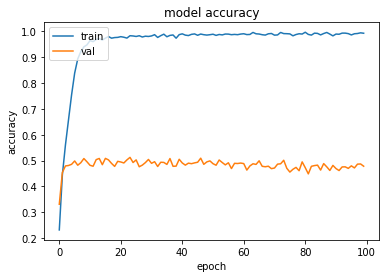

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

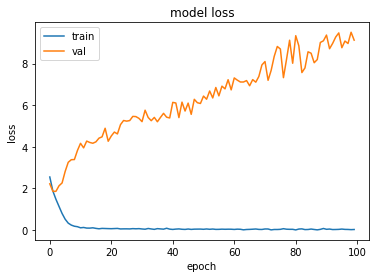

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Podstawowy model Konwolucyjnej Sieci Neuronowej + Data ugmentation + Dropout

In [14]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip(
        mode = "horizontal",
        input_shape = (image_height, image_width, 3)
    ),
    keras.layers.RandomRotation(
        factor = 0.4
    ),
    keras.layers.RandomZoom(
        height_factor = 0.2
    )
])

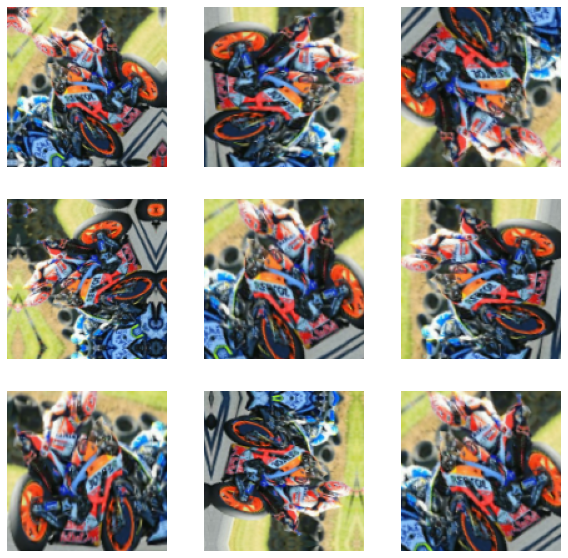

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in training_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[1].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
model_2 = Sequential([
    # Data augmentation
    data_augmentation,

    # Rescaling images to 0-1 values
    keras.layers.Rescaling(
        scale = 1. / 255
    ),

    # First convolutional layer
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Second convolutional layer
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Second convolutional layer
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

        # Second convolutional layer
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    # Dropout layer
    keras.layers.Dropout(0.2),

    # Flatten image data
    keras.layers.Flatten(),

    # Dense layers
    keras.layers.Dense(256, activation='relu'),
    
    # Output layer
    keras.layers.Dense(23, activation = 'softmax')
])

In [ ]:
model_2.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
)

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 128, 128, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                  

In [ ]:
history_2 = model_2.fit(training_dataset, validation_data = validation_dataset, epochs = 100)

Epoch 1/100
359/359 [==============================] - 20s 51ms/step - loss: 2.6220 - accuracy: 0.2051 - val_loss: 2.3759 - val_accuracy: 0.2877
Epoch 2/100
359/359 [==============================] - 18s 50ms/step - loss: 2.2038 - accuracy: 0.3314 - val_loss: 2.0642 - val_accuracy: 0.3823
Epoch 3/100
359/359 [==============================] - 18s 50ms/step - loss: 2.0474 - accuracy: 0.3808 - val_loss: 2.3837 - val_accuracy: 0.3341
Epoch 4/100
359/359 [==============================] - 19s 53ms/step - loss: 1.9379 - accuracy: 0.4148 - val_loss: 1.9240 - val_accuracy: 0.4207
Epoch 5/100
359/359 [==============================] - 18s 51ms/step - loss: 1.8579 - accuracy: 0.4295 - val_loss: 2.0386 - val_accuracy: 0.3963
Epoch 6/100
359/359 [==============================] - 18s 50ms/step - loss: 1.7771 - accuracy: 0.4606 - val_loss: 2.0882 - val_accuracy: 0.3994
Epoch 7/100
359/359 [==============================] - 18s 50ms/step - loss: 1.7377 - accuracy: 0.4726 - val_loss: 2.0183 - val_ac

In [ ]:
import matplotlib.pyplot as plt

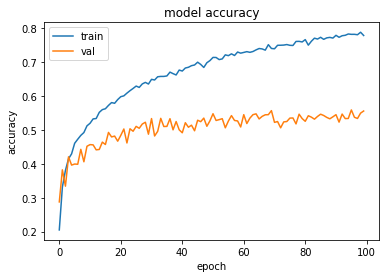

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

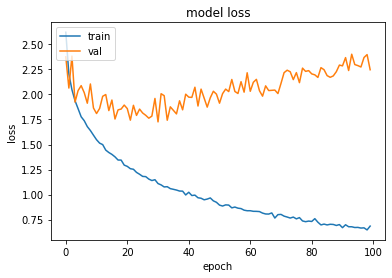

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Porownanie wynikow uczenia po wprowadzeniu ulepszen

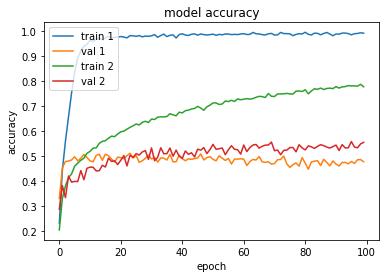

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train 1', 'val 1', 'train 2', 'val 2'], loc='upper left')
plt.show()

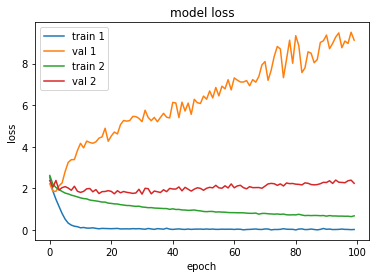

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train 1', 'val 1', 'train 2', 'val 2'], loc='upper left')
plt.show()

# Wykorzystanie wczesniej przeszkolonego modelu sieci neuronowej - ResNet50

W celu przeszkolenia modelu nr 3 użyto sieci RestNet50

RestNet50 jest wariantem sieci CNN mogącym pracowac na głebokosci 50 warst, jest to sieć rozwiązująca problem znikania gradientów ( pogorszenia efektywności uszenia) przy dodawaniu kolejnych warstw.

W dalszej częsci sprawozdania zostanie porównanana efektywnośc podelu podstawowego sieci, ulepszonego oraz modelu RestNet50

In [15]:
model_ResNet50 = tf.keras.applications.ResNet50(
    include_top = False,
    weights = "imagenet",
    pooling = None,
    classifier_activation = "softmax",
    input_shape = (image_height, image_width, 3)
)

94781440/94765736 [==============================] - 0s 0us/step


In [16]:
model_ResNet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 134, 134, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 64, 64, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 64, 64, 64)   256         ['conv1_conv[0][0]']      

In [17]:
model_ResNet50.trainable = True

In [18]:
model_3 = keras.Sequential([
    data_augmentation,
    keras.layers.Rescaling(
        scale = 1. / 255,
    ),
    model_ResNet50,
    layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(23, activation = 'softmax')
])

In [19]:
model_3.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [20]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 128, 128, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 23)                47127     
                                                      

In [21]:
history_3 = model_3.fit(training_dataset, validation_data = validation_dataset, epochs = 100)

Epoch 1/100
359/359 [==============================] - 72s 148ms/step - loss: 2.2210 - accuracy: 0.3660 - val_loss: 9.4749 - val_accuracy: 0.0548
Epoch 2/100
359/359 [==============================] - 54s 150ms/step - loss: 1.7057 - accuracy: 0.4872 - val_loss: 3.2890 - val_accuracy: 0.0978
Epoch 3/100
359/359 [==============================] - 53s 148ms/step - loss: 1.5360 - accuracy: 0.5415 - val_loss: 3.5222 - val_accuracy: 0.2266
Epoch 4/100
359/359 [==============================] - 53s 146ms/step - loss: 1.4024 - accuracy: 0.5806 - val_loss: 2.2285 - val_accuracy: 0.4061
Epoch 5/100
359/359 [==============================] - 53s 146ms/step - loss: 1.3504 - accuracy: 0.5960 - val_loss: 2.6993 - val_accuracy: 0.3205
Epoch 6/100
359/359 [==============================] - 52s 145ms/step - loss: 1.2408 - accuracy: 0.6198 - val_loss: 2.9540 - val_accuracy: 0.2881
Epoch 7/100
359/359 [==============================] - 53s 145ms/step - loss: 1.1755 - accuracy: 0.6448 - val_loss: 3.0572 -

In [22]:
import matplotlib.pyplot as plt

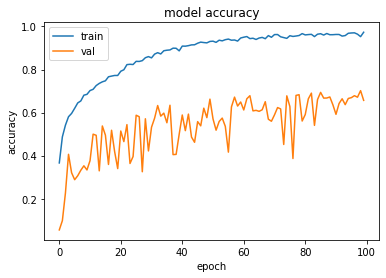

In [23]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

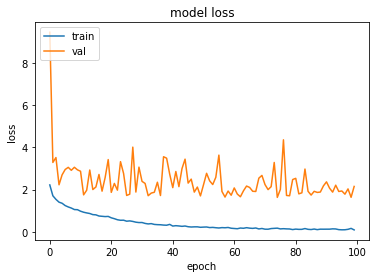

In [24]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()